In [110]:
!pip install celluloid
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate

!pip install importlib.resources
from importlib.resources import path
import numpy as np 
import matplotlib.pyplot as plt
import os.path as path
import wget

from importlib.resources import path
import numpy as np 
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

# 1.1 Series de Fourier

Esta parte se encuentra adjunta en el archivo .pdf que se encuentra en el repositorio

# 1.2 Presentación de funciones

La primera parte se encuentra desarrollada en el archivo .pdf que se encuentra adjunta en el repositorio. Con esto se llegó a la serie de Fourier de la función y despues se realizó su solucion computacionalmente

In [111]:
def funcion1(t, n):
    return (2*((-1)**(n+1))/n)*np.sin(n*t)

In [112]:
L = np.pi
cicles = 2
tiempo = np.linspace(0,2*cicles*L,100)

In [113]:
initial_n = 1
final_n = 50
Funtion = 0

<IPython.core.display.Javascript object>


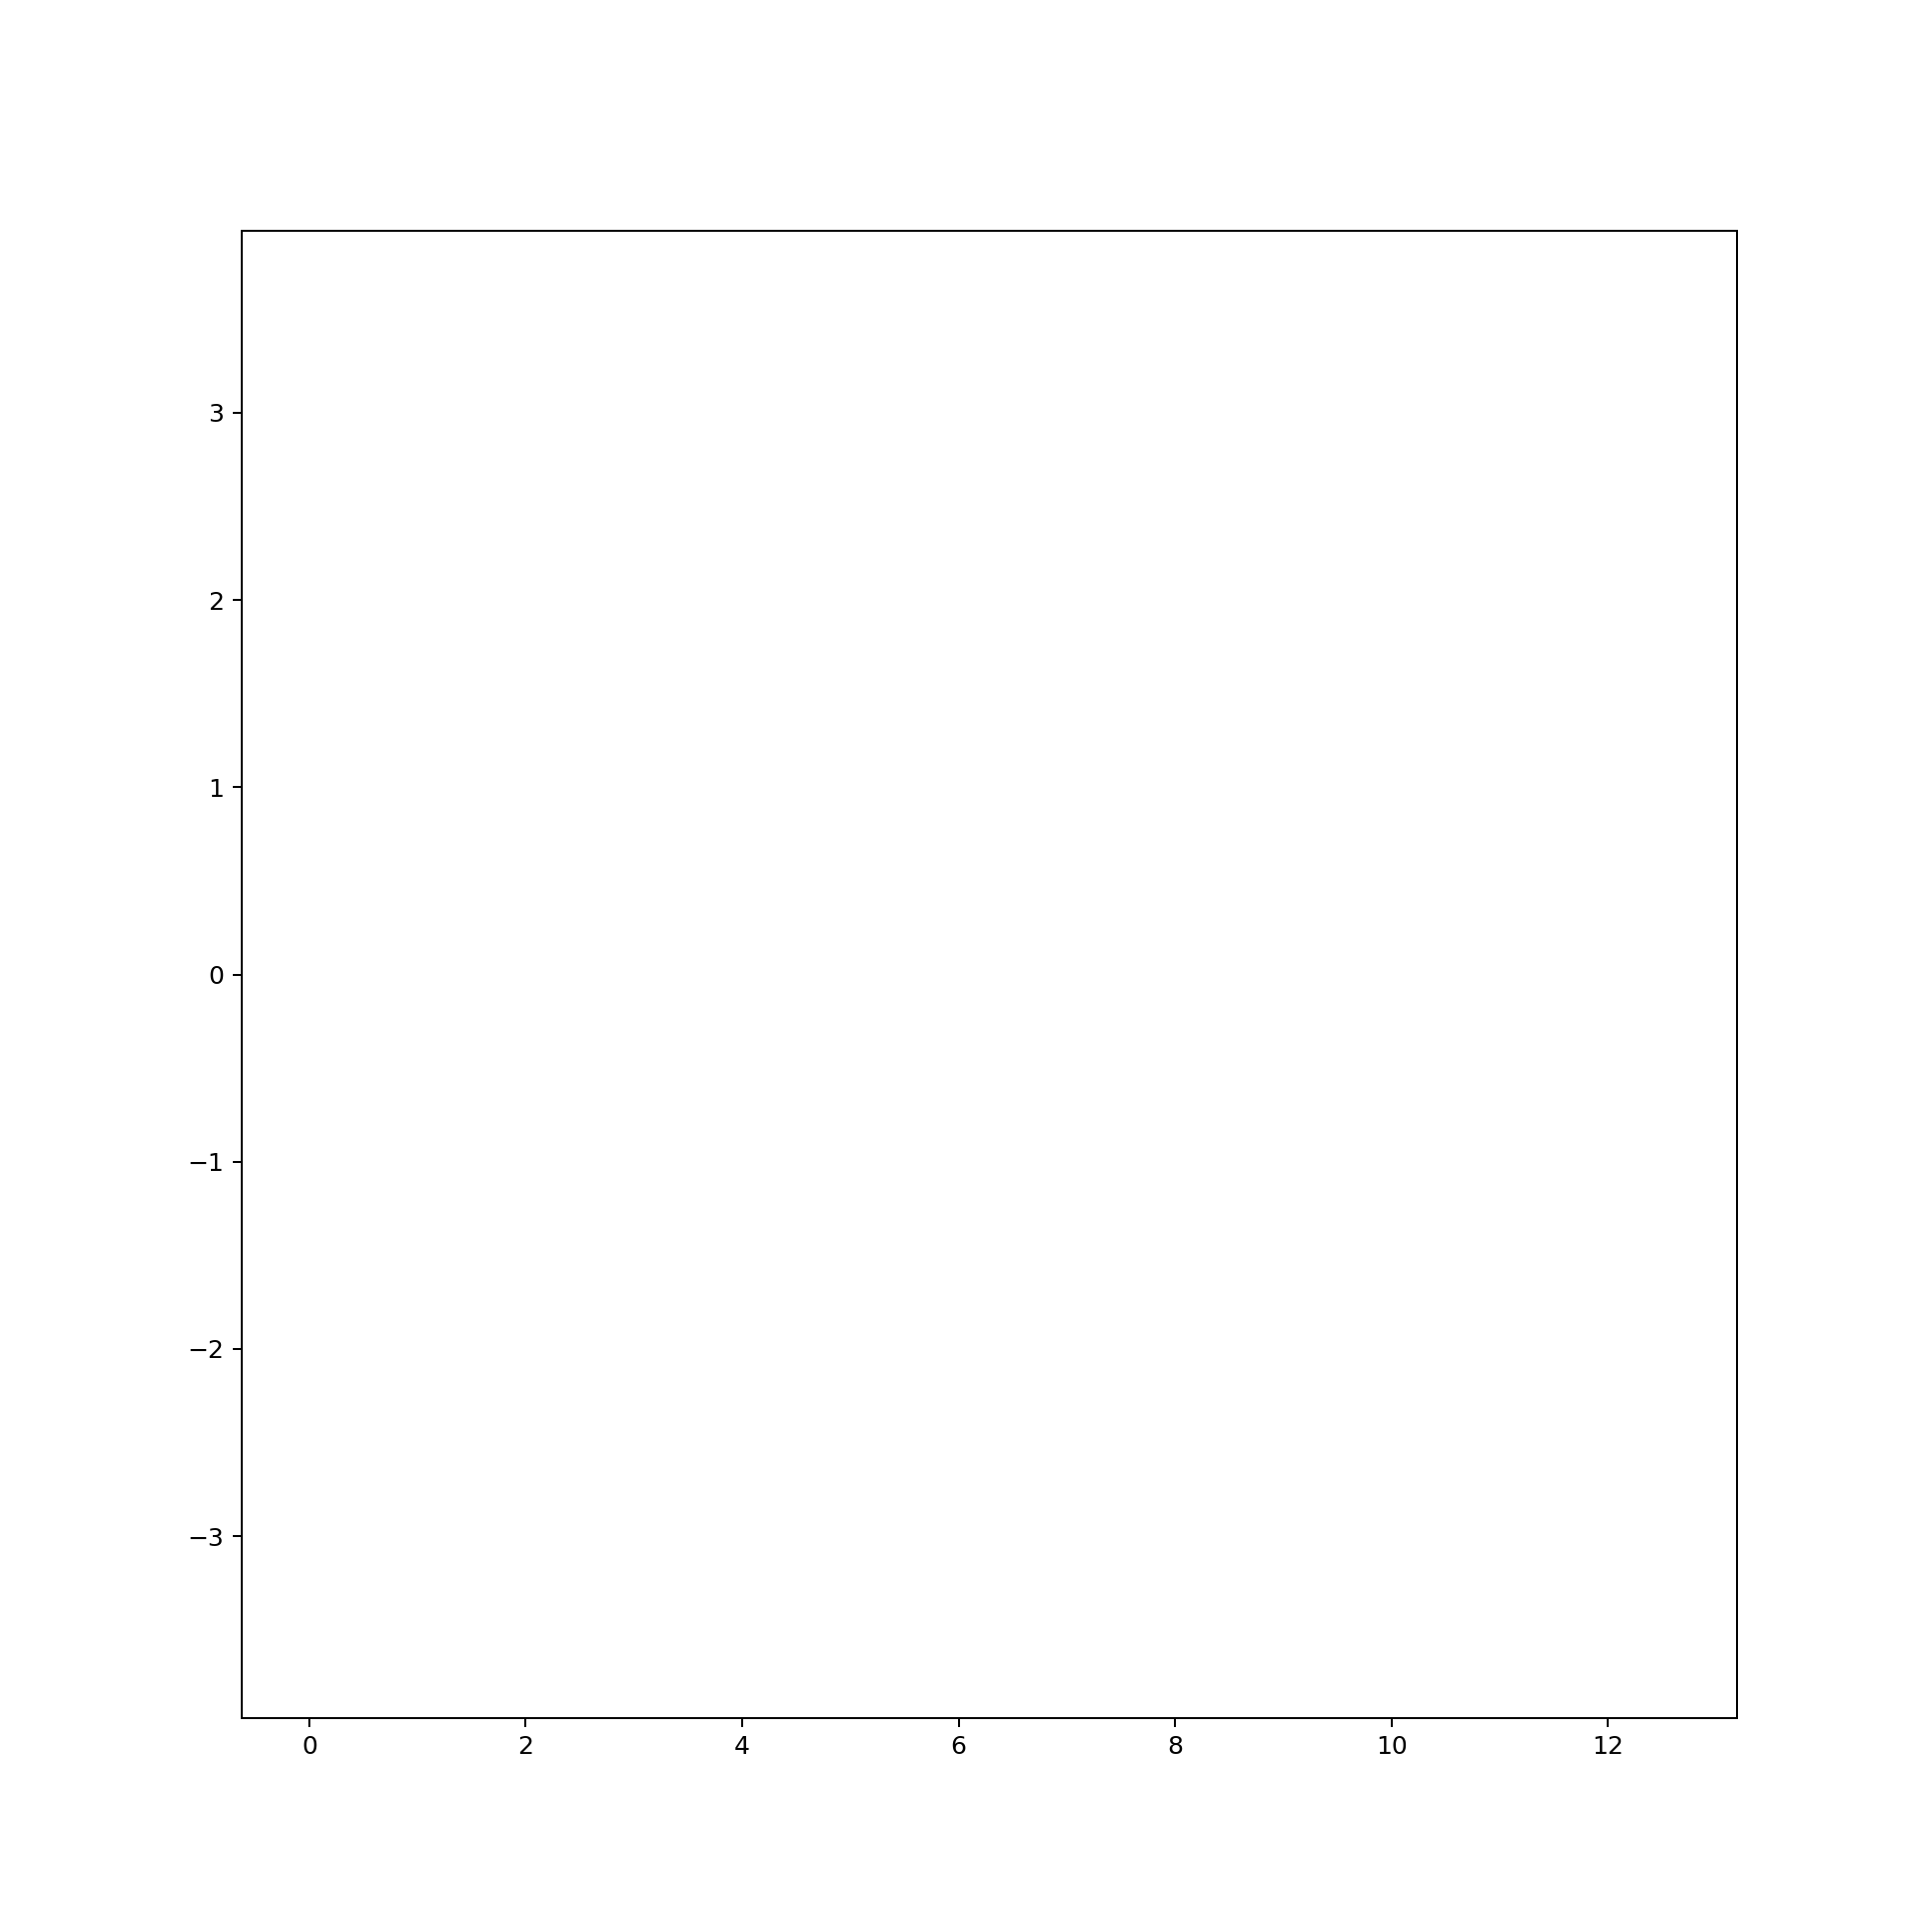

In [114]:
fig = plt.figure(figsize=(6,6))
camera = Camera(fig)

In [115]:
while initial_n < final_n:
    Funtion += funcion1(tiempo, initial_n)
    plt.plot(tiempo,Funtion,c='k')
    camera.snap()
    initial_n += 1 

In [116]:
animation = camera.animate()
animation.save("fourierFuntion.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


# 1.3 Función Zeta (6) de Riemann

La primera parte de este punto se encuentra en el archivo .pdf que esta subido en el repositorio. La solución numerica empleando la integración por cuadratura de Gauss se encuentra en la siguiente sección.

In [117]:
#Definicion de la funcion inicial
def funcion(x): 
    return (x**3 - (np.pi**2)*x)**2


In [118]:
a = -np.pi #Limite inferior de integración
b = np.pi  #Limite superior de integracion

In [119]:
integral = integrate.quad(funcion,a,b) #Integral numerica con cuadratura de Gauss
integral = integral[0]/(144*np.pi)


In [120]:
print(f"La estimación númerica de la zeta 6 de Riemann es: {integral}")

La estimación númerica de la zeta 6 de Riemann es: 1.017343061984449


# 1.4 Derivadas espectrales


In [121]:
tiempo =np.linspace(-2*np.pi,2*np.pi,100)
pasos = 100/(4*np.pi)


In [122]:
#Definición de funciones 
def funcion_inicial(tiempo):
    f = np.exp(-0.1*tiempo)*np.sin(tiempo)
    return f

def derivada_exacta(tiempo):
    f = -0.1*np.exp(-0.1*tiempo)*np.sin(tiempo) + np.exp(-0.1*tiempo)*np.cos(tiempo)
    return f

def derivada_central(f,tiempo,pasos):
    d = 0
    if pasos != 0:
        d = (f(tiempo+pasos)-f(tiempo-pasos))/(2*pasos)
    return d

def derivada_derecha(f,tiempo,pasos):
    d = 0
    if pasos != 0:
        d = (f(tiempo+pasos)-f(tiempo))/pasos
    return d


<IPython.core.display.Javascript object>


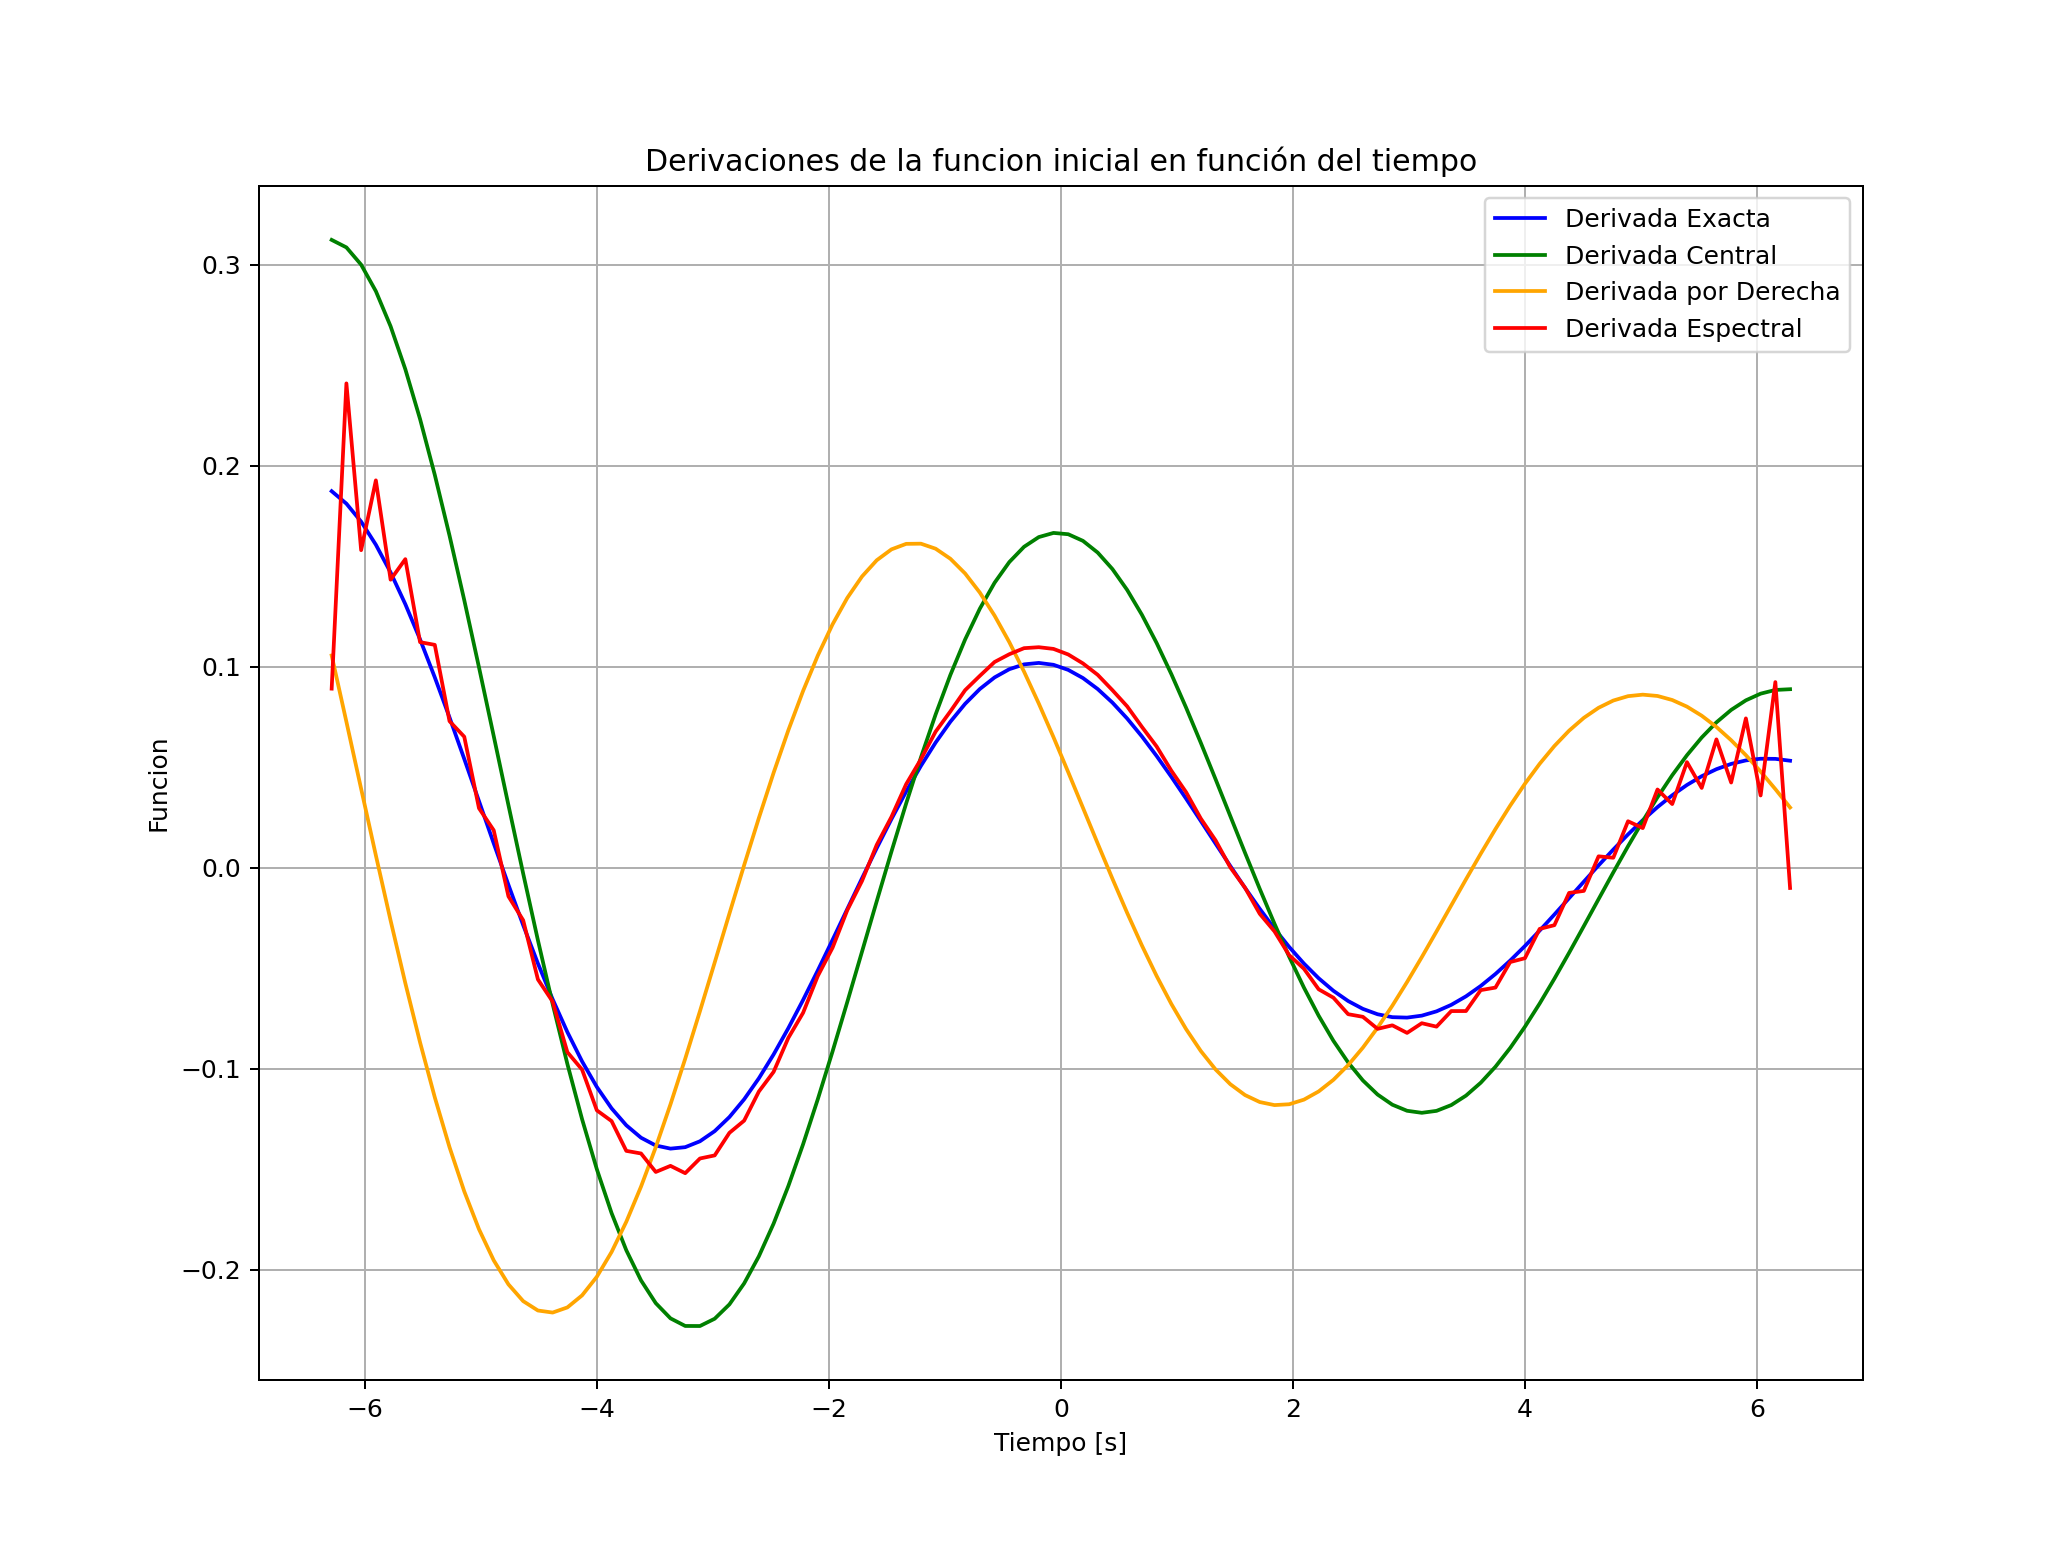

/Users/rafaelvelasquez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [123]:

X = np.fft.fft(funcion_inicial(tiempo))
derivada_central = derivada_central(funcion_inicial,tiempo,pasos)
derivada_derecha = derivada_derecha(funcion_inicial,tiempo,pasos)
derivada_exacta = (derivada_exacta(tiempo))/10

frequecy =np.fft.fftfreq(np.size(tiempo),np.max(derivada_exacta))
X *=1j*frequecy
Derivada_espectral = np.fft.ifft(X)

plt.figure()
plt.plot(tiempo,derivada_exacta,color='blue',label='Derivada Exacta')
plt.plot(tiempo,derivada_central,color='green',label='Derivada Central')
plt.plot(tiempo,derivada_derecha,color='orange',label='Derivada por Derecha')
plt.plot(tiempo,Derivada_espectral,color='red',label='Derivada Espectral')
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Funcion")
plt.title("Derivaciones de la funcion inicial en función del tiempo")
plt.legend()
plt.show()
plt.savefig('Derivative superposition.png')

# 1.5 Manchas Solares

El codigo que soluciona este problema se encuentra en otro notebook debido a que se presentó un problema.